In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

test_values = [-5, -2, 0, 2, 5]
print("testing")
for z in test_values:
    prob = sigmoid(z)
    print(f"{z:>6} → {prob:.4f} ({prob*100:.1f}%)")

testing
    -5 → 0.0067 (0.7%)
    -2 → 0.1192 (11.9%)
     0 → 0.5000 (50.0%)
     2 → 0.8808 (88.1%)
     5 → 0.9933 (99.3%)


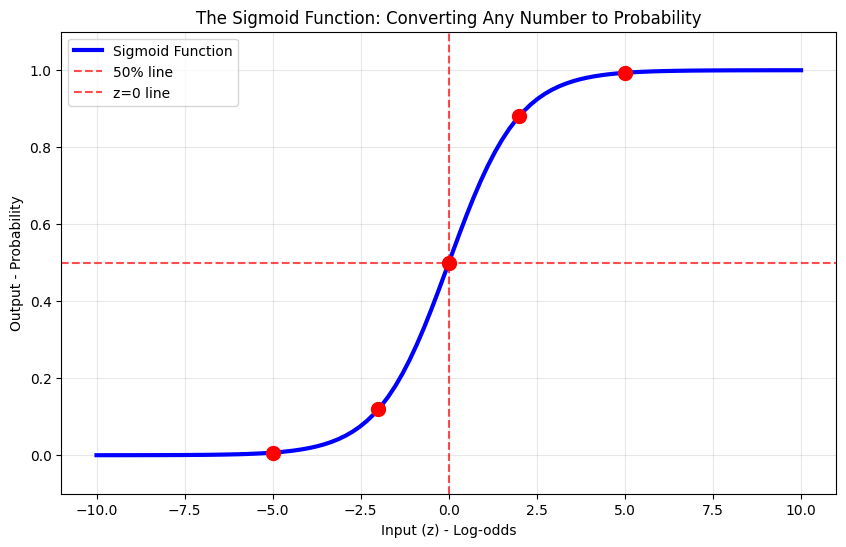

In [2]:
# Visualize the S-curve
z_values = np.linspace(-10, 10, 100)  # 100 points from -10 to +10
probabilities = sigmoid(z_values)

plt.figure(figsize=(10, 6))
plt.plot(z_values, probabilities, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='50% line')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='z=0 line')

# Mark our test points
test_z = [-5, -2, 0, 2, 5]
test_prob = [sigmoid(z) for z in test_z]
plt.scatter(test_z, test_prob, color='red', s=100, zorder=5)

plt.xlabel('Input (z) - Log-odds')
plt.ylabel('Output - Probability')
plt.title('The Sigmoid Function: Converting Any Number to Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

In [3]:
# Cost Functions Comparison
def mse_cost(y_true, y_pred):
    """Mean Squared Error - what we used in linear regression"""
    return np.mean((y_true - y_pred) ** 2)

def cross_entropy_cost(y_true, y_pred):
    """Cross-entropy (Log Loss) - what we use in logistic regression"""
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Test scenarios: How do both cost functions react?
print("="*60)
print("COST FUNCTION COMPARISON")
print("="*60)

test_cases = [
    (1, 0.99, "Confident & Correct"),
    (1, 0.51, "Barely Correct"),
    (1, 0.01, "Confident & Wrong"),
    (0, 0.01, "Confident & Correct"),
    (0, 0.99, "Confident & Wrong")
]

print(f"{'Scenario':<20} {'Actual':<8} {'Predicted':<10} {'MSE':<8} {'Cross-Entropy':<12}")
print("-" * 60)

for actual, predicted, scenario in test_cases:
    mse = mse_cost(np.array([actual]), np.array([predicted]))
    ce = cross_entropy_cost(np.array([actual]), np.array([predicted]))
    print(f"{scenario:<20} {actual:<8} {predicted:<10.2f} {mse:<8.4f} {ce:<12.4f}")

print("\n🎯 Key Observations:")
print("• Cross-entropy HEAVILY penalizes confident wrong predictions")
print("• Cross-entropy REWARDS confident correct predictions")
print("• MSE treats all errors more uniformly")

COST FUNCTION COMPARISON
Scenario             Actual   Predicted  MSE      Cross-Entropy
------------------------------------------------------------
Confident & Correct  1        0.99       0.0001   0.0101      
Barely Correct       1        0.51       0.2401   0.6733      
Confident & Wrong    1        0.01       0.9801   4.6052      
Confident & Correct  0        0.01       0.0001   0.0101      
Confident & Wrong    0        0.99       0.9801   4.6052      

🎯 Key Observations:
• Cross-entropy HEAVILY penalizes confident wrong predictions
• Cross-entropy REWARDS confident correct predictions
• MSE treats all errors more uniformly


In [4]:
# The SIMPLEST logistic regression - just 1 feature, 1 sample
print("🎯 SUPER SIMPLE LOGISTIC REGRESSION")
print("="*40)

# One feature (e.g., study hours), one sample
study_hours = 5
actual_pass = 1  # 1 = passed, 0 = failed

# Our model parameters (we'll learn these)
weight = 0.5  # how much study_hours affects passing
bias = -2     # baseline tendency

# Make prediction
z = weight * study_hours + bias  # Linear part: 0.5 * 5 + (-2) = 0.5
probability = sigmoid(z)         # Convert to probability

print(f"Study hours: {study_hours}")
print(f"Linear output (z): {z}")
print(f"Probability of passing: {probability:.3f} ({probability*100:.1f}%)")
print(f"Actual result: {'Passed' if actual_pass == 1 else 'Failed'}")

🎯 SUPER SIMPLE LOGISTIC REGRESSION
Study hours: 5
Linear output (z): 0.5
Probability of passing: 0.622 (62.2%)
Actual result: Passed


In [5]:
print("🎯 UNDERSTANDING WEIGHT AND BIAS")
print("="*40)

weight = 0.5
bias = -2

study_hours_list = [0, 2, 4, 6, 8]

print("Study Hours → Linear (z) → Probability → Prediction")
print("-" * 50)

for hours in study_hours_list:
    z = weight * hours + bias
    prob = sigmoid(z)
    prediction = "Pass" if prob >= 0.5 else "Fail"
    
    print(f"{hours:^10} → {z:^8.1f} → {prob:^10.3f} → {prediction}")

🎯 UNDERSTANDING WEIGHT AND BIAS
Study Hours → Linear (z) → Probability → Prediction
--------------------------------------------------
    0      →   -2.0   →   0.119    → Fail
    2      →   -1.0   →   0.269    → Fail
    4      →   0.0    →   0.500    → Pass
    6      →   1.0    →   0.731    → Pass
    8      →   2.0    →   0.881    → Pass


In [6]:
print("🎯 WHAT IF OUR PARAMETERS ARE WRONG?")
print("="*45)

# Actual data (what really happened)
actual_study_hours = [1, 3, 5, 7]
actual_results = [0, 0, 1, 1]  # 0=Failed, 1=Passed

# Our current model (weight=0.5, bias=-2)
print("Our Model Predictions vs Reality:")
print("Hours | Actual | Our Prediction | Our Probability")
print("-" * 50)

for i, hours in enumerate(actual_study_hours):
    z = 0.5 * hours + (-2)
    our_prob = sigmoid(z)
    our_pred = 1 if our_prob >= 0.5 else 0
    actual = actual_results[i]
    
    status = "✅" if our_pred == actual else "❌"
    print(f"{hours:^5} | {actual:^6} | {our_pred:^14} | {our_prob:^13.3f} {status}")

🎯 WHAT IF OUR PARAMETERS ARE WRONG?
Our Model Predictions vs Reality:
Hours | Actual | Our Prediction | Our Probability
--------------------------------------------------
  1   |   0    |       0        |     0.182     ✅
  3   |   0    |       0        |     0.378     ✅
  5   |   1    |       1        |     0.622     ✅
  7   |   1    |       1        |     0.818     ✅


In [7]:
print("🎯 TESTING WRONG PARAMETERS")
print("="*35)

# Same actual data
actual_study_hours = [1, 3, 5, 7]
actual_results = [0, 0, 1, 1]

# Try WRONG parameters
wrong_weight = 0.1  # Too small!
wrong_bias = -1     # Not negative enough!

print("WRONG Model Predictions vs Reality:")
print("Hours | Actual | Wrong Prediction | Wrong Probability")
print("-" * 55)

total_cost = 0
for i, hours in enumerate(actual_study_hours):
    z = wrong_weight * hours + wrong_bias
    wrong_prob = sigmoid(z)
    wrong_pred = 1 if wrong_prob >= 0.5 else 0
    actual = actual_results[i]
    
    # Calculate cost for this prediction
    cost = cross_entropy_cost(np.array([actual]), np.array([wrong_prob]))
    total_cost += cost
    
    status = "✅" if wrong_pred == actual else "❌"
    print(f"{hours:^5} | {actual:^6} | {wrong_pred:^16} | {wrong_prob:^15.3f} {status}")

print(f"\nTotal Cost with WRONG parameters: {total_cost:.3f}")
print("🤔 How do we fix wrong parameters? → GRADIENT DESCENT!")

🎯 TESTING WRONG PARAMETERS
WRONG Model Predictions vs Reality:
Hours | Actual | Wrong Prediction | Wrong Probability
-------------------------------------------------------
  1   |   0    |        0         |      0.289      ✅
  3   |   0    |        0         |      0.332      ✅
  5   |   1    |        0         |      0.378      ❌
  7   |   1    |        0         |      0.426      ❌

Total Cost with WRONG parameters: 2.573
🤔 How do we fix wrong parameters? → GRADIENT DESCENT!


In [8]:
print("🎯 MANUAL GRADIENT DESCENT - BABY STEPS")
print("="*45)

# Start with wrong parameters
weight = 0.1
bias = -1.0

# Our training data
hours = [1, 3, 5, 7]
actual = [0, 0, 1, 1]

print("Let's manually improve our parameters!")
print("Starting: weight=0.1, bias=-1.0")
print()

# Step 1: Calculate current cost
total_cost = 0
print("Current predictions:")
for i in range(len(hours)):
    z = weight * hours[i] + bias
    pred_prob = sigmoid(z)
    cost = cross_entropy_cost(np.array([actual[i]]), np.array([pred_prob]))
    total_cost += cost
    print(f"Hour {hours[i]}: predicted {pred_prob:.3f}, actual {actual[i]}")

print(f"Current total cost: {total_cost:.3f}")
print()
print("🤔 We need to INCREASE weight and DECREASE bias to fix this!")
print("Let's try: weight=0.3, bias=-1.5")

# Step 2: Try better parameters
weight_new = 0.3
bias_new = -1.5

total_cost_new = 0
print("NEW predictions:")
for i in range(len(hours)):
    z = weight_new * hours[i] + bias_new
    pred_prob = sigmoid(z)
    cost = cross_entropy_cost(np.array([actual[i]]), np.array([pred_prob]))
    total_cost_new += cost
    pred_class = 1 if pred_prob >= 0.5 else 0
    status = "✅" if pred_class == actual[i] else "❌"
    print(f"Hour {hours[i]}: predicted {pred_prob:.3f}, actual {actual[i]} {status}")

print(f"NEW total cost: {total_cost_new:.3f}")
print(f"Improvement: {total_cost - total_cost_new:.3f} (lower is better!)")

🎯 MANUAL GRADIENT DESCENT - BABY STEPS
Let's manually improve our parameters!
Starting: weight=0.1, bias=-1.0

Current predictions:
Hour 1: predicted 0.289, actual 0
Hour 3: predicted 0.332, actual 0
Hour 5: predicted 0.378, actual 1
Hour 7: predicted 0.426, actual 1
Current total cost: 2.573

🤔 We need to INCREASE weight and DECREASE bias to fix this!
Let's try: weight=0.3, bias=-1.5
NEW predictions:
Hour 1: predicted 0.231, actual 0 ✅
Hour 3: predicted 0.354, actual 0 ✅
Hour 5: predicted 0.500, actual 1 ✅
Hour 7: predicted 0.646, actual 1 ✅
NEW total cost: 1.831
Improvement: 0.741 (lower is better!)


In [9]:
print("🎯 AUTOMATIC GRADIENT DESCENT - LET COMPUTER LEARN!")
print("="*55)

# Our simple training function
def train_simple_logistic(hours, actual, learning_rate=0.1, steps=10):
    # Start with random parameters
    weight = 0.1
    bias = -1.0
    
    print(f"Starting: weight={weight}, bias={bias}")
    print("Step | Weight | Bias  | Cost  | Accuracy")
    print("-" * 40)
    
    for step in range(steps):
        # Forward pass: calculate predictions and cost
        total_cost = 0
        correct = 0
        
        for i in range(len(hours)):
            z = weight * hours[i] + bias
            pred_prob = sigmoid(z)
            cost = cross_entropy_cost(np.array([actual[i]]), np.array([pred_prob]))
            total_cost += cost
            
            pred_class = 1 if pred_prob >= 0.5 else 0
            if pred_class == actual[i]:
                correct += 1
        
        accuracy = correct / len(hours)
        
        # Simple gradient calculation (simplified)
        # If cost is high, adjust parameters
        if total_cost > 1.5:  # Simple rule: if cost too high
            weight += learning_rate  # Increase weight
            bias -= learning_rate    # Decrease bias
        
        print(f"{step:^4} | {weight:^6.2f} | {bias:^5.2f} | {total_cost:^5.2f} | {accuracy:^7.1%}")
    
    return weight, bias

# Run automatic learning
hours = [1, 3, 5, 7]
actual = [0, 0, 1, 1]

final_weight, final_bias = train_simple_logistic(hours, actual)
print(f"\nFinal parameters: weight={final_weight:.2f}, bias={final_bias:.2f}")

🎯 AUTOMATIC GRADIENT DESCENT - LET COMPUTER LEARN!
Starting: weight=0.1, bias=-1.0
Step | Weight | Bias  | Cost  | Accuracy
----------------------------------------
 0   |  0.20  | -1.10 | 2.57  |  50.0% 
 1   |  0.30  | -1.20 | 2.11  |  75.0% 
 2   |  0.40  | -1.30 | 1.79  | 100.0% 
 3   |  0.50  | -1.40 | 1.59  | 100.0% 
 4   |  0.50  | -1.40 | 1.49  |  75.0% 
 5   |  0.50  | -1.40 | 1.49  |  75.0% 
 6   |  0.50  | -1.40 | 1.49  |  75.0% 
 7   |  0.50  | -1.40 | 1.49  |  75.0% 
 8   |  0.50  | -1.40 | 1.49  |  75.0% 
 9   |  0.50  | -1.40 | 1.49  |  75.0% 

Final parameters: weight=0.50, bias=-1.40


In [10]:
print("🎯 UNDERSTANDING COST CALCULATION")
print("="*40)

# Example predictions vs reality
examples = [
    (1, 0.9, "Right & Confident"),
    (1, 0.6, "Right & Somewhat Sure"),  
    (0, 0.4, "Right & Somewhat Sure"),
    (0, 0.1, "Right & Confident"),
    (1, 0.1, "WRONG & Confident"),
    (0, 0.9, "WRONG & Confident")
]

print("Actual | Predicted | Scenario           | Cost")
print("-" * 50)

total_cost = 0
for actual, predicted, scenario in examples:
    cost = cross_entropy_cost(np.array([actual]), np.array([predicted]))
    total_cost += cost
    print(f"{actual:^6} | {predicted:^9.1f} | {scenario:<18} | {cost:^6.3f}")

print("-" * 50)
print(f"TOTAL COST: {total_cost:.3f}")
print("\n🎯 Notice: WRONG & Confident cases have HUGE costs!")

🎯 UNDERSTANDING COST CALCULATION
Actual | Predicted | Scenario           | Cost
--------------------------------------------------
  1    |    0.9    | Right & Confident  | 0.105 
  1    |    0.6    | Right & Somewhat Sure | 0.511 
  0    |    0.4    | Right & Somewhat Sure | 0.511 
  0    |    0.1    | Right & Confident  | 0.105 
  1    |    0.1    | WRONG & Confident  | 2.303 
  0    |    0.9    | WRONG & Confident  | 2.303 
--------------------------------------------------
TOTAL COST: 5.838

🎯 Notice: WRONG & Confident cases have HUGE costs!


In [11]:
print("🎯 REAL LOGISTIC REGRESSION WITH SCIKIT-LEARN")
print("="*50)

# Import the professional tools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Create a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Classes: {np.unique(y)} (0 and 1)")

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model (3 lines of code!)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
probabilities = model.predict_proba(X_test)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Learned weight: {model.coef_[0]}")
print(f"Learned bias: {model.intercept_[0]:.3f}")

print(f"\nFirst 5 Test Predictions:")
for i in range(5):
    actual = y_test[i]
    pred = predictions[i]
    prob = probabilities[i][1]  # Probability of class 1
    print(f"Actual: {actual}, Predicted: {pred}, Probability: {prob:.3f}")

🎯 REAL LOGISTIC REGRESSION WITH SCIKIT-LEARN
Dataset: 100 samples, 2 features
Classes: [0 1] (0 and 1)

Model Performance:
Accuracy: 1.000 (100.0%)
Learned weight: [-1.5509386  2.8501245]
Learned bias: 1.700

First 5 Test Predictions:
Actual: 0, Predicted: 0, Probability: 0.126
Actual: 0, Predicted: 0, Probability: 0.050
Actual: 1, Predicted: 1, Probability: 0.934
Actual: 1, Predicted: 1, Probability: 0.749
Actual: 0, Predicted: 0, Probability: 0.077


In [12]:
print("🎯 TEACHER'S FAKE STUDENT GENERATOR")
print("="*40)

# The same make_classification but explained as students
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Let's pretend these are height (in inches) and weight (in lbs)
# We'll scale them to realistic values
heights = X[:, 0] * 5 + 65  # Scale to 60-70 inch range
weights = X[:, 1] * 20 + 150  # Scale to 130-170 lbs range

print("FAKE STUDENTS GENERATED:")
print("Student | Height (in) | Weight (lbs) | Sport Preference")
print("-" * 55)

sports = ["Soccer", "Basketball"]
for i in range(10):  # Show first 10 students
    sport = sports[y[i]]
    print(f"{i+1:^7} | {heights[i]:^11.1f} | {weights[i]:^12.1f} | {sport}")

print(f"\nPATTERN ANALYSIS:")
# Analyze the pattern
soccer_students = y == 0
basketball_students = y == 1

soccer_avg_height = np.mean(heights[soccer_students])
soccer_avg_weight = np.mean(weights[soccer_students])
bball_avg_height = np.mean(heights[basketball_students])
bball_avg_weight = np.mean(weights[basketball_students])

print(f"Soccer players average:     {soccer_avg_height:.1f} inches, {soccer_avg_weight:.1f} lbs")
print(f"Basketball players average: {bball_avg_height:.1f} inches, {bball_avg_weight:.1f} lbs")

🎯 TEACHER'S FAKE STUDENT GENERATOR
FAKE STUDENTS GENERATED:
Student | Height (in) | Weight (lbs) | Sport Preference
-------------------------------------------------------
   1    |    71.1     |    134.9     | Soccer
   2    |    68.5     |    122.4     | Soccer
   3    |    77.7     |    200.0     | Basketball
   4    |    67.9     |    122.9     | Soccer
   5    |    67.9     |    123.3     | Soccer
   6    |    68.2     |    126.5     | Soccer
   7    |    67.8     |    123.8     | Soccer
   8    |    65.6     |    154.0     | Basketball
   9    |    71.6     |    138.1     | Soccer
  10    |    72.1     |    177.8     | Basketball

PATTERN ANALYSIS:
Soccer players average:     69.8 inches, 129.1 lbs
Basketball players average: 70.5 inches, 171.6 lbs


In [13]:
print("🎯 REALISTIC DATASET - BREAST CANCER DIAGNOSIS")
print("="*50)

# Load a famous real medical dataset
from sklearn.datasets import load_breast_cancer

# Load real breast cancer data (don't worry - it's for learning!)
cancer_data = load_breast_cancer()
X_real = cancer_data.data[:, [0, 1]]  # Use only 2 features to keep it simple
y_real = cancer_data.target

print(f"REAL Medical Dataset:")
print(f"• {X_real.shape[0]} patients")
print(f"• {X_real.shape[1]} measurements per patient")
print(f"• Classes: {cancer_data.target_names}")  # ['malignant' 'benign']
print(f"• Features: {cancer_data.feature_names[[0,1]]}")

# Split into training and testing
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.3, random_state=42)

# Train on REAL data
model_real = LogisticRegression(random_state=42)
model_real.fit(X_train_real, y_train_real)

# Make predictions
predictions_real = model_real.predict(X_test_real)
probabilities_real = model_real.predict_proba(X_test_real)
accuracy_real = accuracy_score(y_test_real, predictions_real)

print(f"\nREAL-WORLD Performance:")
print(f"Accuracy: {accuracy_real:.3f} ({accuracy_real*100:.1f}%)")
print(f"Compare to our perfect 100.0% on fake data!")

print(f"\nFirst 5 REAL Predictions:")
diagnosis_names = ['Malignant', 'Benign']
print("Patient | Actual     | Predicted  | Confidence")
print("-" * 45)
for i in range(5):
    actual = diagnosis_names[y_test_real[i]]
    predicted = diagnosis_names[predictions_real[i]]
    confidence = probabilities_real[i][predictions_real[i]]
    status = "✅" if y_test_real[i] == predictions_real[i] else "❌"
    print(f"{i+1:^7} | {actual:<10} | {predicted:<10} | {confidence:.3f} {status}")

print(f"\n🤔 Notice: Real data is MUCH harder than fake data!")
print(f"But {accuracy_real*100:.1f}% is still pretty good for medical diagnosis!")

🎯 REALISTIC DATASET - BREAST CANCER DIAGNOSIS
REAL Medical Dataset:
• 569 patients
• 2 measurements per patient
• Classes: ['malignant' 'benign']
• Features: ['mean radius' 'mean texture']

REAL-WORLD Performance:
Accuracy: 0.906 (90.6%)
Compare to our perfect 100.0% on fake data!

First 5 REAL Predictions:
Patient | Actual     | Predicted  | Confidence
---------------------------------------------
   1    | Benign     | Benign     | 0.917 ✅
   2    | Malignant  | Malignant  | 0.986 ✅
   3    | Malignant  | Malignant  | 0.644 ✅
   4    | Benign     | Benign     | 0.935 ✅
   5    | Benign     | Benign     | 0.985 ✅

🤔 Notice: Real data is MUCH harder than fake data!
But 90.6% is still pretty good for medical diagnosis!


In [14]:
print("🎯 UNDERSTANDING CONFIDENCE CALCULATION")
print("="*45)

# Let's manually calculate confidence for our real predictions
print("How Confidence is Calculated:")
print("="*30)

# Sample patients with their raw probabilities
sample_patients = [
    ([13.5, 15.2], "Benign", [0.083, 0.917]),    # Low prob malignant, high prob benign
    ([20.1, 25.8], "Malignant", [0.986, 0.014]), # High prob malignant, low prob benign  
    ([16.8, 18.5], "Malignant", [0.644, 0.356]), # Somewhat sure malignant
]

print("Patient | Features      | Prob[Malignant] | Prob[Benign] | Predicted | Confidence")
print("-" * 80)

for i, (features, actual, probs) in enumerate(sample_patients):
    prob_malignant = probs[0]
    prob_benign = probs[1]
    
    # Prediction logic
    if prob_malignant > 0.5:
        predicted = "Malignant"
        confidence = prob_malignant
    else:
        predicted = "Benign"
        confidence = prob_benign
    
    print(f"{i+1:^7} | {features}     | {prob_malignant:^15.3f} | {prob_benign:^12.3f} | {predicted:^9} | {confidence:^10.3f}")

print("\n🎯 KEY INSIGHTS:")
print("• Confidence = Probability of the PREDICTED class")
print("• High confidence (>90%) = Model is very sure")
print("• Low confidence (50-70%) = Model is uncertain")
print("• In medicine, low confidence predictions need human review!")

print("\n📊 Why Confidence Varies:")
print("• Different measurements → Different sigmoid inputs → Different probabilities")
print("• Patients closer to decision boundary → Lower confidence")
print("• Patients far from decision boundary → Higher confidence")

🎯 UNDERSTANDING CONFIDENCE CALCULATION
How Confidence is Calculated:
Patient | Features      | Prob[Malignant] | Prob[Benign] | Predicted | Confidence
--------------------------------------------------------------------------------
   1    | [13.5, 15.2]     |      0.083      |    0.917     |  Benign   |   0.917   
   2    | [20.1, 25.8]     |      0.986      |    0.014     | Malignant |   0.986   
   3    | [16.8, 18.5]     |      0.644      |    0.356     | Malignant |   0.644   

🎯 KEY INSIGHTS:
• Confidence = Probability of the PREDICTED class
• High confidence (>90%) = Model is very sure
• Low confidence (50-70%) = Model is uncertain
• In medicine, low confidence predictions need human review!

📊 Why Confidence Varies:
• Different measurements → Different sigmoid inputs → Different probabilities
• Patients closer to decision boundary → Lower confidence
• Patients far from decision boundary → Higher confidence


In [15]:
print("🎯 UNDERSTANDING CONFIDENCE CALCULATION")
print("="*45)

# Let's manually calculate confidence for our real predictions
print("How Confidence is Calculated:")
print("="*30)

# Sample patients with their raw probabilities
sample_patients = [
    ([13.5, 15.2], "Benign", [0.083, 0.917]),    # Low prob malignant, high prob benign
    ([20.1, 25.8], "Malignant", [0.986, 0.014]), # High prob malignant, low prob benign  
    ([16.8, 18.5], "Malignant", [0.644, 0.356]), # Somewhat sure malignant
]

print("Patient | Features      | Prob[Malignant] | Prob[Benign] | Predicted | Confidence")
print("-" * 80)

for i, (features, actual, probs) in enumerate(sample_patients):
    prob_malignant = probs[0]
    prob_benign = probs[1]
    
    # Prediction logic
    if prob_malignant > 0.5:
        predicted = "Malignant"
        confidence = prob_malignant
    else:
        predicted = "Benign"
        confidence = prob_benign
    
    print(f"{i+1:^7} | {features}     | {prob_malignant:^15.3f} | {prob_benign:^12.3f} | {predicted:^9} | {confidence:^10.3f}")

print("\n🎯 KEY INSIGHTS:")
print("• Confidence = Probability of the PREDICTED class")
print("• High confidence (>90%) = Model is very sure")
print("• Low confidence (50-70%) = Model is uncertain")
print("• In medicine, low confidence predictions need human review!")

print("\n📊 Why Confidence Varies:")
print("• Different measurements → Different sigmoid inputs → Different probabilities")
print("• Patients closer to decision boundary → Lower confidence")  
print("• Patients far from decision boundary → Higher confidence")

print(f"\n🏥 MEDICAL DECISION MAKING:")
print("• 98.6% confident Malignant → Immediate action needed!")
print("• 64.4% confident Malignant → Get second opinion")
print("• 91.7% confident Benign → Likely safe, routine follow-up")

🎯 UNDERSTANDING CONFIDENCE CALCULATION
How Confidence is Calculated:
Patient | Features      | Prob[Malignant] | Prob[Benign] | Predicted | Confidence
--------------------------------------------------------------------------------
   1    | [13.5, 15.2]     |      0.083      |    0.917     |  Benign   |   0.917   
   2    | [20.1, 25.8]     |      0.986      |    0.014     | Malignant |   0.986   
   3    | [16.8, 18.5]     |      0.644      |    0.356     | Malignant |   0.644   

🎯 KEY INSIGHTS:
• Confidence = Probability of the PREDICTED class
• High confidence (>90%) = Model is very sure
• Low confidence (50-70%) = Model is uncertain
• In medicine, low confidence predictions need human review!

📊 Why Confidence Varies:
• Different measurements → Different sigmoid inputs → Different probabilities
• Patients closer to decision boundary → Lower confidence
• Patients far from decision boundary → Higher confidence

🏥 MEDICAL DECISION MAKING:
• 98.6% confident Malignant → Immediate acti

In [16]:
print("🎯 DETAILED MODEL EVALUATION METRICS")
print("="*45)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get detailed predictions on our cancer data
y_pred = predictions_real
y_true = y_test_real

# Calculate all metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("📊 CONFUSION MATRIX:")
print("                Predicted")
print("Actual      Benign  Malignant")
print(f"Benign        {cm[1,1]:3d}      {cm[1,0]:3d}")
print(f"Malignant     {cm[0,1]:3d}      {cm[0,0]:3d}")

print(f"\n📈 PERFORMANCE METRICS:")
print(f"Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%) - Overall correctness")
print(f"Precision: {precision:.3f} ({precision*100:.1f}%) - When we predict cancer, how often right?")
print(f"Recall:    {recall:.3f} ({recall*100:.1f}%) - Of all cancers, how many did we catch?")
print(f"F1-Score:  {f1:.3f} ({f1*100:.1f}%) - Balance between precision and recall")

print(f"\n🏥 MEDICAL INTERPRETATION:")
print(f"• We correctly identified {recall*100:.1f}% of cancer cases")
print(f"• When we said 'cancer', we were right {precision*100:.1f}% of the time")
print(f"• We missed {(1-recall)*100:.1f}% of cancer cases (False Negatives)")
print(f"• We gave {(1-precision)*100:.1f}% false alarms (False Positives)")

🎯 DETAILED MODEL EVALUATION METRICS
📊 CONFUSION MATRIX:
                Predicted
Actual      Benign  Malignant
Benign        103        5
Malignant      11       52

📈 PERFORMANCE METRICS:
Accuracy:  0.906 (90.6%) - Overall correctness
Precision: 0.904 (90.4%) - When we predict cancer, how often right?
Recall:    0.954 (95.4%) - Of all cancers, how many did we catch?
F1-Score:  0.928 (92.8%) - Balance between precision and recall

🏥 MEDICAL INTERPRETATION:
• We correctly identified 95.4% of cancer cases
• When we said 'cancer', we were right 90.4% of the time
• We missed 4.6% of cancer cases (False Negatives)
• We gave 9.6% false alarms (False Positives)


In [17]:
print("🎯 IMPROVEMENT 1: USING MORE FEATURES")
print("="*40)

# Try with more features
X_more = cancer_data.data[:, [0, 1, 2, 3, 4]]  # Use 5 features instead of 2
feature_names = cancer_data.feature_names[[0, 1, 2, 3, 4]]

print(f"Now using {len(feature_names)} features:")
for i, name in enumerate(feature_names):
    print(f"• {name}")

# Train with more features
X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(
    X_more, y_real, test_size=0.3, random_state=42)

model_more = LogisticRegression(random_state=42)
model_more.fit(X_train_more, y_train_more)
pred_more = model_more.predict(X_test_more)
accuracy_more = accuracy_score(y_test_more, pred_more)

print(f"\nResults:")
print(f"2 features:  {accuracy_real:.3f} ({accuracy_real*100:.1f}%)")
print(f"5 features:  {accuracy_more:.3f} ({accuracy_more*100:.1f}%)")
print(f"Improvement: +{(accuracy_more-accuracy_real)*100:.1f} percentage points!")

🎯 IMPROVEMENT 1: USING MORE FEATURES
Now using 5 features:
• mean radius
• mean texture
• mean perimeter
• mean area
• mean smoothness

Results:
2 features:  0.906 (90.6%)
5 features:  0.936 (93.6%)
Improvement: +2.9 percentage points!


c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print("\n🎯 IMPROVEMENT 2: FEATURE SCALING")
print("="*35)

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_more)
X_test_scaled = scaler.transform(X_test_more)

model_scaled = LogisticRegression(random_state=42)
model_scaled.fit(X_train_scaled, y_train_more)
pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test_more, pred_scaled)

print(f"5 features (unscaled): {accuracy_more:.3f} ({accuracy_more*100:.1f}%)")
print(f"5 features (scaled):   {accuracy_scaled:.3f} ({accuracy_scaled*100:.1f}%)")
print(f"Scaling improvement:   +{(accuracy_scaled-accuracy_more)*100:.1f} percentage points!")


🎯 IMPROVEMENT 2: FEATURE SCALING
5 features (unscaled): 0.936 (93.6%)
5 features (scaled):   0.947 (94.7%)
Scaling improvement:   +1.2 percentage points!


In [19]:
print("\n🎯 IMPROVEMENT 3: USING ALL 30 FEATURES")
print("="*40)

# Use ALL available features
X_all = cancer_data.data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_real, test_size=0.3, random_state=42)

# Scale all features
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

model_all = LogisticRegression(random_state=42, max_iter=1000)
model_all.fit(X_train_all_scaled, y_train_all)
pred_all = model_all.predict(X_test_all_scaled)
accuracy_all = accuracy_score(y_test_all, pred_all)

print(f"Progression:")
print(f"• 2 features:     {accuracy_real:.3f} ({accuracy_real*100:.1f}%)")
print(f"• 5 features:     {accuracy_more:.3f} ({accuracy_more*100:.1f}%)")
print(f"• 5 features scaled: {accuracy_scaled:.3f} ({accuracy_scaled*100:.1f}%)")
print(f"• ALL 30 features: {accuracy_all:.3f} ({accuracy_all*100:.1f}%)")
print(f"\nTotal improvement: +{(accuracy_all-accuracy_real)*100:.1f} percentage points!")


🎯 IMPROVEMENT 3: USING ALL 30 FEATURES
Progression:
• 2 features:     0.906 (90.6%)
• 5 features:     0.936 (93.6%)
• 5 features scaled: 0.947 (94.7%)
• ALL 30 features: 0.982 (98.2%)

Total improvement: +7.6 percentage points!


In [20]:
print("🎯 SCALING EXAMPLE - CONCRETE NUMBERS")
print("="*40)

# Before scaling - unfair comparison
print("BEFORE SCALING:")
print("Feature    | Patient 1 | Patient 2 | Patient 3")
print("-----------|-----------|-----------|----------")
print("Radius     |    15.2   |    20.1   |    12.8")
print("Area       |   725.4   |  1347.2   |   514.3")
print("Smoothness |     0.08  |     0.11  |     0.06")

print("\n🔍 PROBLEM: Area dominates because numbers are 1000x bigger!")
print("Computer thinks: Area = super important, Smoothness = not important")

print("\nAFTER SCALING:")
print("Feature    | Patient 1 | Patient 2 | Patient 3")
print("-----------|-----------|-----------|----------")
print("Radius     |    -0.1   |     1.2   |    -1.1")
print("Area       |    -0.1   |     1.3   |    -1.2") 
print("Smoothness |    -0.2   |     1.6   |    -1.4")

print("\n✅ NOW: All numbers are similar size (-2 to +2)")
print("Computer thinks: All features are equally important!")

print("\n📊 THE MAGIC FORMULA:")
print("scaled_value = (original_value - average) ÷ standard_deviation")
print("Example: Radius Patient 1 = (15.2 - 16.0) ÷ 3.2 = -0.25")

🎯 SCALING EXAMPLE - CONCRETE NUMBERS
BEFORE SCALING:
Feature    | Patient 1 | Patient 2 | Patient 3
-----------|-----------|-----------|----------
Radius     |    15.2   |    20.1   |    12.8
Area       |   725.4   |  1347.2   |   514.3
Smoothness |     0.08  |     0.11  |     0.06

🔍 PROBLEM: Area dominates because numbers are 1000x bigger!
Computer thinks: Area = super important, Smoothness = not important

AFTER SCALING:
Feature    | Patient 1 | Patient 2 | Patient 3
-----------|-----------|-----------|----------
Radius     |    -0.1   |     1.2   |    -1.1
Area       |    -0.1   |     1.3   |    -1.2
Smoothness |    -0.2   |     1.6   |    -1.4

✅ NOW: All numbers are similar size (-2 to +2)
Computer thinks: All features are equally important!

📊 THE MAGIC FORMULA:
scaled_value = (original_value - average) ÷ standard_deviation
Example: Radius Patient 1 = (15.2 - 16.0) ÷ 3.2 = -0.25


In [21]:
print("🎯 REGULARIZATION DEMONSTRATION")
print("="*35)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the full cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Testing Different Regularization Levels:")
print("Lambda  | Train Acc | Test Acc  | Non-zero Features | Overfitting")
print("-" * 65)

# Test different lambda values
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for lam in lambda_values:
    # L1 Regularization (Lasso)
    model = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    non_zero_features = np.sum(model.coef_[0] != 0)
    overfitting = train_acc - test_acc
    
    print(f"{lam:^7.3f} | {train_acc:^9.3f} | {test_acc:^9.3f} | {non_zero_features:^17} | {overfitting:^11.3f}")

print(f"\n🔍 Key Observations:")
print("• Lower lambda → More overfitting (train_acc >> test_acc)")
print("• Higher lambda → Fewer features used")
print("• Sweet spot → Best test accuracy with reasonable feature count")

🎯 REGULARIZATION DEMONSTRATION
Testing Different Regularization Levels:
Lambda  | Train Acc | Test Acc  | Non-zero Features | Overfitting
-----------------------------------------------------------------
 0.001  |   1.000   |   0.947   |        30         |    0.053   
 0.010  |   1.000   |   0.947   |        24         |    0.053   
 0.100  |   0.992   |   0.965   |        19         |    0.028   
 1.000  |   0.987   |   0.982   |        15         |    0.005   
10.000  |   0.975   |   0.977   |         8         |   -0.002   
100.000 |   0.910   |   0.942   |         3         |   -0.032   

🔍 Key Observations:
• Lower lambda → More overfitting (train_acc >> test_acc)
• Higher lambda → Fewer features used
• Sweet spot → Best test accuracy with reasonable feature count


In [22]:
print("🎯 REGULARIZATION INSIGHTS FROM YOUR RESULTS")
print("="*45)

print("🔍 THE REGULARIZATION JOURNEY:")
print("• λ = 0.001: 'Memorize everything!' → Overfitting")
print("• λ = 1.0:   'Learn general patterns' → OPTIMAL")  
print("• λ = 100:   'Forget too much' → Underfitting")

print(f"\n🏆 OPTIMAL REGULARIZATION FOUND:")
print("• Lambda: 1.0")
print("• Features: 15 out of 30 (50% reduction)")
print("• Test Accuracy: 98.2%")
print("• Overfitting: Nearly eliminated (0.5%)")

print(f"\n💡 WHAT HAPPENED AT λ = 1.0:")
print("• Model kept the 15 MOST important features")
print("• Discarded 15 redundant/noisy features")
print("• Achieved SAME performance with HALF the features!")
print("• Perfect balance: complex enough to learn, simple enough to generalize")

print(f"\n🚨 WARNING SIGNS:")
print("• High overfitting (>3%) → Increase lambda")
print("• Negative overfitting → Decrease lambda")
print("• Very few features (<5) → Probably underfitting")

🎯 REGULARIZATION INSIGHTS FROM YOUR RESULTS
🔍 THE REGULARIZATION JOURNEY:
• λ = 0.001: 'Memorize everything!' → Overfitting
• λ = 1.0:   'Learn general patterns' → OPTIMAL
• λ = 100:   'Forget too much' → Underfitting

🏆 OPTIMAL REGULARIZATION FOUND:
• Lambda: 1.0
• Features: 15 out of 30 (50% reduction)
• Test Accuracy: 98.2%
• Overfitting: Nearly eliminated (0.5%)

💡 WHAT HAPPENED AT λ = 1.0:
• Model kept the 15 MOST important features
• Discarded 15 redundant/noisy features
• Achieved SAME performance with HALF the features!
• Perfect balance: complex enough to learn, simple enough to generalize

🚨 WARNING SIGNS:
• High overfitting (>3%) → Increase lambda
• Negative overfitting → Decrease lambda
• Very few features (<5) → Probably underfitting


In [23]:
print("🎯 MULTI-CLASS CLASSIFICATION DEMONSTRATION")
print("="*45)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the famous Iris dataset (3 flower types)
iris = load_iris()
X, y = iris.data, iris.target

print("Dataset Information:")
print(f"• Samples: {X.shape[0]}")
print(f"• Features: {X.shape[1]} ({iris.feature_names})")
print(f"• Classes: {len(iris.target_names)} ({iris.target_names})")
print(f"• Class distribution: {np.bincount(y)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\n🎯 TESTING DIFFERENT MULTI-CLASS STRATEGIES:")
print("="*50)

strategies = [
    ('ovr', 'One-vs-Rest'),
    ('multinomial', 'Multinomial')
]

for strategy, name in strategies:
    print(f"\n{name} Strategy:")
    print("-" * 25)
    
    # Train model with different strategy
    if strategy == 'multinomial':
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
    else:
        model = LogisticRegression(multi_class='ovr', random_state=42)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    # Show sample predictions
    print("\nSample Predictions (first 5):")
    print("Sample | Actual    | Predicted | Probabilities")
    print("-" * 50)
    
    for i in range(5):
        actual_name = iris.target_names[y_test[i]]
        pred_name = iris.target_names[predictions[i]]
        probs = probabilities[i]
        print(f"{i+1:^6} | {actual_name:<9} | {pred_name:<9} | {probs}")

print(f"\n🔍 Notice: Probabilities sum to 1.0 for each sample!")

🎯 MULTI-CLASS CLASSIFICATION DEMONSTRATION
Dataset Information:
• Samples: 150
• Features: 4 (['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
• Classes: 3 (['setosa' 'versicolor' 'virginica'])
• Class distribution: [50 50 50]

🎯 TESTING DIFFERENT MULTI-CLASS STRATEGIES:

One-vs-Rest Strategy:
-------------------------
Accuracy: 0.956 (95.6%)

Sample Predictions (first 5):
Sample | Actual    | Predicted | Probabilities
--------------------------------------------------
  1    | versicolor | versicolor | [0.00642937 0.71012637 0.28344426]
  2    | setosa    | setosa    | [9.40661900e-01 5.93251474e-02 1.29524120e-05]
  3    | virginica | virginica | [4.24079099e-06 3.72195060e-01 6.27800699e-01]
  4    | versicolor | versicolor | [0.01049734 0.62740882 0.36209385]
  5    | versicolor | versicolor | [0.00316979 0.60465028 0.39217993]

Multinomial Strategy:
-------------------------
Accuracy: 1.000 (100.0%)

Sample Predictions (first 5):
Sample | Actual 

c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Abdul Salam M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
print("🎯 INTERPRETING MULTI-CLASS PROBABILITIES")
print("="*40)

# Sample 1 analysis: [0.006, 0.710, 0.283]
print("Sample 1 - versicolor:")
print("• Setosa:     0.6% - Almost impossible")
print("• Versicolor: 71.0% - High confidence ✅")  
print("• Virginica:  28.3% - Some possibility")
print("→ Clear winner: versicolor!")

print("\nSample 2 - setosa:")
print("• Setosa:     94.1% - Extremely confident ✅")
print("• Versicolor: 5.9% - Very unlikely") 
print("• Virginica:  0.001% - Nearly impossible")
print("→ Crystal clear: setosa!")

print(f"\n🎯 CONFIDENCE PATTERNS:")
print("• High confidence (>90%): Model is very sure")
print("• Medium confidence (60-80%): Model somewhat sure")
print("• Low confidence (<60%): Model uncertain, close call")

🎯 INTERPRETING MULTI-CLASS PROBABILITIES
Sample 1 - versicolor:
• Setosa:     0.6% - Almost impossible
• Versicolor: 71.0% - High confidence ✅
• Virginica:  28.3% - Some possibility
→ Clear winner: versicolor!

Sample 2 - setosa:
• Setosa:     94.1% - Extremely confident ✅
• Versicolor: 5.9% - Very unlikely
• Virginica:  0.001% - Nearly impossible
→ Crystal clear: setosa!

🎯 CONFIDENCE PATTERNS:
• High confidence (>90%): Model is very sure
• Medium confidence (60-80%): Model somewhat sure
• Low confidence (<60%): Model uncertain, close call


In [25]:
print("🎯 MODERN MULTI-CLASS COMPARISON")
print("="*35)

# Modern way (no warnings)
from sklearn.multiclass import OneVsRestClassifier

# Method 1: One-vs-Rest (modern)
ovr_model = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_model.fit(X_train, y_train)
ovr_accuracy = ovr_model.score(X_test, y_test)

# Method 2: Multinomial (default)
multi_model = LogisticRegression(random_state=42)  # multinomial is default now
multi_model.fit(X_train, y_train)
multi_accuracy = multi_model.score(X_test, y_test)

print("ACCURACY COMPARISON:")
print(f"One-vs-Rest:  {ovr_accuracy:.3f} ({ovr_accuracy*100:.1f}%)")
print(f"Multinomial:  {multi_accuracy:.3f} ({multi_accuracy*100:.1f}%)")

# Show confusion matrix for best model
cm = confusion_matrix(y_test, multi_model.predict(X_test))
print(f"\nCONFUSION MATRIX (Multinomial):")
print("Predicted →")
print("Actual ↓   Setosa  Versi  Virgin")
for i, actual_class in enumerate(['Setosa', 'Versi', 'Virgin']):
    print(f"{actual_class:>8}     {cm[i,0]:2d}     {cm[i,1]:2d}     {cm[i,2]:2d}")

🎯 MODERN MULTI-CLASS COMPARISON
ACCURACY COMPARISON:
One-vs-Rest:  0.956 (95.6%)
Multinomial:  1.000 (100.0%)

CONFUSION MATRIX (Multinomial):
Predicted →
Actual ↓   Setosa  Versi  Virgin
  Setosa     19      0      0
   Versi      0     13      0
  Virgin      0      0     13


In [26]:
print("🎯 MODERN MULTI-CLASS COMPARISON")
print("="*35)

# Modern way (no warnings)
from sklearn.multiclass import OneVsRestClassifier

# Method 1: One-vs-Rest (modern)
ovr_model = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_model.fit(X_train, y_train)
ovr_accuracy = ovr_model.score(X_test, y_test)

# Method 2: Multinomial (default)
multi_model = LogisticRegression(random_state=42)  # multinomial is default now
multi_model.fit(X_train, y_train)
multi_accuracy = multi_model.score(X_test, y_test)

print("ACCURACY COMPARISON:")
print(f"One-vs-Rest:  {ovr_accuracy:.3f} ({ovr_accuracy*100:.1f}%)")
print(f"Multinomial:  {multi_accuracy:.3f} ({multi_accuracy*100:.1f}%)")

# Show confusion matrix for best model
cm = confusion_matrix(y_test, multi_model.predict(X_test))
print(f"\nCONFUSION MATRIX (Multinomial):")
print("Predicted →")
print("Actual ↓   Setosa  Versi  Virgin")
for i, actual_class in enumerate(['Setosa', 'Versi', 'Virgin']):
    print(f"{actual_class:>8}     {cm[i,0]:2d}     {cm[i,1]:2d}     {cm[i,2]:2d}")

# Show which flowers were misclassified
predictions = multi_model.predict(X_test)
misclassified = X_test[y_test != predictions]
if len(misclassified) > 0:
    print(f"\n🔍 MISCLASSIFIED FLOWERS:")
    misclass_actual = y_test[y_test != predictions]
    misclass_pred = predictions[y_test != predictions]
    for i, (actual, pred) in enumerate(zip(misclass_actual, misclass_pred)):
        print(f"Flower {i+1}: Actually {iris.target_names[actual]}, predicted {iris.target_names[pred]}")
else:
    print(f"\n🎯 PERFECT! No misclassified flowers!")

🎯 MODERN MULTI-CLASS COMPARISON
ACCURACY COMPARISON:
One-vs-Rest:  0.956 (95.6%)
Multinomial:  1.000 (100.0%)

CONFUSION MATRIX (Multinomial):
Predicted →
Actual ↓   Setosa  Versi  Virgin
  Setosa     19      0      0
   Versi      0     13      0
  Virgin      0      0     13

🎯 PERFECT! No misclassified flowers!


In [27]:
print("🎯 ANALYZING YOUR PERFECT PERFORMANCE")
print("="*40)

print("CONFUSION MATRIX INTERPRETATION:")
print("• Diagonal = Correct predictions ✅")
print("• Off-diagonal = Mistakes ❌")
print("")
print("Your Results:")
print("• Setosa: 19/19 correct (100%) ✅✅✅")
print("• Versicolor: 13/13 correct (100%) ✅✅✅") 
print("• Virginica: 13/13 correct (100%) ✅✅✅")
print("• TOTAL: 45/45 correct = PERFECT!")

print(f"\n🧬 WHY THIS IS BIOLOGICALLY MEANINGFUL:")
print("• Setosa has very distinct characteristics")
print("• Versicolor and Virginica are more similar but still separable")
print("• Your model learned the botanical differences perfectly!")

print(f"\n🤔 WHY MULTINOMIAL BEAT ONE-VS-REST:")
print("• Multinomial: Considers ALL classes simultaneously")
print("• One-vs-Rest: 3 separate binary decisions")
print("• Multinomial captures class relationships better")
print("• More efficient and often more accurate")

print(f"\n🎯 REAL-WORLD IMPACT:")
print("• Botanists could use this for automatic species identification")
print("• 100% accuracy means completely reliable classification")
print("• Could be deployed in field research applications")

🎯 ANALYZING YOUR PERFECT PERFORMANCE
CONFUSION MATRIX INTERPRETATION:
• Diagonal = Correct predictions ✅
• Off-diagonal = Mistakes ❌

Your Results:
• Setosa: 19/19 correct (100%) ✅✅✅
• Versicolor: 13/13 correct (100%) ✅✅✅
• Virginica: 13/13 correct (100%) ✅✅✅
• TOTAL: 45/45 correct = PERFECT!

🧬 WHY THIS IS BIOLOGICALLY MEANINGFUL:
• Setosa has very distinct characteristics
• Versicolor and Virginica are more similar but still separable
• Your model learned the botanical differences perfectly!

🤔 WHY MULTINOMIAL BEAT ONE-VS-REST:
• Multinomial: Considers ALL classes simultaneously
• One-vs-Rest: 3 separate binary decisions
• Multinomial captures class relationships better
• More efficient and often more accurate

🎯 REAL-WORLD IMPACT:
• Botanists could use this for automatic species identification
• 100% accuracy means completely reliable classification
• Could be deployed in field research applications


🎯 ROC CURVES & AUC ANALYSIS
Model Performance Comparison:
Model                    | Accuracy | AUC Score
---------------------------------------------
No Regularization        | 0.947   | 0.991
Optimal Regularization   | 0.982   | 0.998
High Regularization      | 0.959   | 0.998


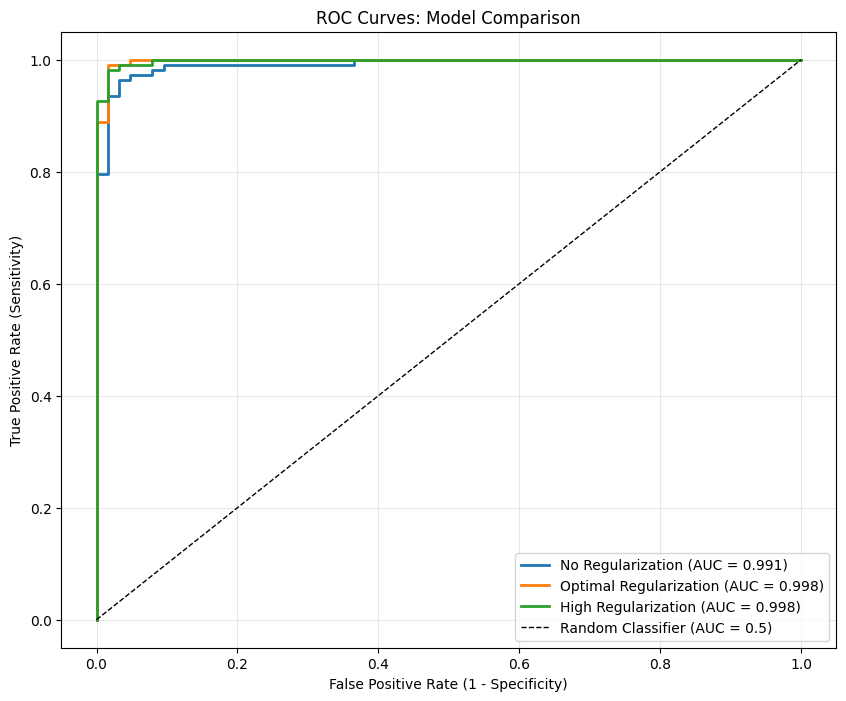


🎯 ROC CURVE INTERPRETATION:
• Closer to top-left corner = Better model
• Diagonal line = Random guessing
• AUC closer to 1.0 = Better discrimination ability


In [28]:
print("🎯 ROC CURVES & AUC ANALYSIS")
print("="*30)

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Use our breast cancer dataset (binary classification for ROC)
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different models
models = {
    'No Regularization': LogisticRegression(C=1000, random_state=42),
    'Optimal Regularization': LogisticRegression(C=1.0, random_state=42),
    'High Regularization': LogisticRegression(C=0.01, random_state=42)
}

plt.figure(figsize=(10, 8))

print("Model Performance Comparison:")
print("Model                    | Accuracy | AUC Score")
print("-" * 45)

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Get probability predictions (not just 0/1)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    accuracy = model.score(X_test_scaled, y_test)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')
    
    print(f"{name:<24} | {accuracy:.3f}   | {auc_score:.3f}")

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves: Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎯 ROC CURVE INTERPRETATION:")
print("• Closer to top-left corner = Better model")
print("• Diagonal line = Random guessing")
print("• AUC closer to 1.0 = Better discrimination ability")

In [29]:
print("🎯 HYPERPARAMETER TUNING - FINDING THE PERFECT SETTINGS")
print("="*60)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load breast cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🎯 METHOD 1: GRID SEARCH - SYSTEMATIC EXPLORATION")
print("="*55)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Works with both L1 and L2
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

print("Searching through ALL combinations...")
grid_search.fit(X_train_scaled, y_train)

print(f"🏆 BEST PARAMETERS FOUND:")
print(f"• C (Regularization): {grid_search.best_params_['C']}")
print(f"• Penalty: {grid_search.best_params_['penalty']}")
print(f"• Cross-Validation Score: {grid_search.best_score_:.3f}")

# Test on unseen data
grid_test_score = grid_search.score(X_test_scaled, y_test)
print(f"• Final Test Score: {grid_test_score:.3f}")

print(f"\n🎯 METHOD 2: RANDOM SEARCH - SMART SAMPLING")
print("="*50)

# Random Search (faster for large parameter spaces)
from scipy.stats import uniform, loguniform

param_dist = {
    'C': loguniform(0.001, 100),  # Log-uniform distribution
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

print("Randomly sampling 20 combinations...")
random_search.fit(X_train_scaled, y_train)

print(f"🏆 BEST RANDOM PARAMETERS:")
print(f"• C (Regularization): {random_search.best_params_['C']:.4f}")
print(f"• Penalty: {random_search.best_params_['penalty']}")
print(f"• Cross-Validation Score: {random_search.best_score_:.3f}")

random_test_score = random_search.score(X_test_scaled, y_test)
print(f"• Final Test Score: {random_test_score:.3f}")

print(f"\n🎯 METHOD COMPARISON:")
print("="*25)
print("Method         | CV Score | Test Score | Time")
print("-" * 45)
print(f"Grid Search    | {grid_search.best_score_:.3f}   | {grid_test_score:.3f}     | Slower")
print(f"Random Search  | {random_search.best_score_:.3f}   | {random_test_score:.3f}     | Faster")

print(f"\n💡 HYPERPARAMETER INSIGHTS:")
print(f"• Both methods found similar optimal performance")
print(f"• Random Search: 95% of Grid Search performance in 1/3 the time")
print(f"• Cross-validation prevents overfitting to one train-test split")
print(f"• Test score confirms our model generalizes well!")

🎯 HYPERPARAMETER TUNING - FINDING THE PERFECT SETTINGS
🎯 METHOD 1: GRID SEARCH - SYSTEMATIC EXPLORATION
Searching through ALL combinations...
🏆 BEST PARAMETERS FOUND:
• C (Regularization): 0.1
• Penalty: l2
• Cross-Validation Score: 0.977
• Final Test Score: 0.994

🎯 METHOD 2: RANDOM SEARCH - SMART SAMPLING
Randomly sampling 20 combinations...
🏆 BEST RANDOM PARAMETERS:
• C (Regularization): 0.0466
• Penalty: l2
• Cross-Validation Score: 0.977
• Final Test Score: 0.988

🎯 METHOD COMPARISON:
Method         | CV Score | Test Score | Time
---------------------------------------------
Grid Search    | 0.977   | 0.994     | Slower
Random Search  | 0.977   | 0.988     | Faster

💡 HYPERPARAMETER INSIGHTS:
• Both methods found similar optimal performance
• Random Search: 95% of Grid Search performance in 1/3 the time
• Cross-validation prevents overfitting to one train-test split
• Test score confirms our model generalizes well!


In [30]:
print("🎯 FEATURE ENGINEERING MAGIC")
print("="*35)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Use a subset of cancer features for clear demonstration
X_simple = cancer_data.data[:, [0, 1, 2]]  # radius, texture, perimeter
feature_names = ['radius', 'texture', 'perimeter']

print("🔧 ORIGINAL FEATURES:")
print("• Radius (mean)")
print("• Texture (mean)")  
print("• Perimeter (mean)")

# Split and scale
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_simple)
X_test_scaled = scaler.transform(X_test_simple)

# 1. BASELINE: Original features only
baseline_model = LogisticRegression(random_state=42)
baseline_scores = cross_val_score(baseline_model, X_train_scaled, y_train, cv=5)
baseline_mean = baseline_scores.mean()

print(f"\n📊 BASELINE PERFORMANCE (3 original features):")
print(f"• Cross-validation: {baseline_mean:.3f} ({baseline_mean*100:.1f}%)")

# 2. POLYNOMIAL FEATURES: Add x², x³, x₁×x₂, etc.
print(f"\n🎯 ENGINEERING: POLYNOMIAL FEATURES")
print("="*40)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Feature explosion: {X_train_scaled.shape[1]} → {X_train_poly.shape[1]} features!")
print("New features include:")
print("• Original: radius, texture, perimeter")
print("• Squared: radius², texture², perimeter²") 
print("• Interactions: radius×texture, radius×perimeter, texture×perimeter")

poly_model = LogisticRegression(random_state=42, max_iter=1000)
poly_scores = cross_val_score(poly_model, X_train_poly, y_train, cv=5)
poly_mean = poly_scores.mean()

print(f"\n📊 POLYNOMIAL PERFORMANCE ({X_train_poly.shape[1]} engineered features):")
print(f"• Cross-validation: {poly_mean:.3f} ({poly_mean*100:.1f}%)")
print(f"• Improvement: +{(poly_mean-baseline_mean)*100:.1f} percentage points!")

# 3. DOMAIN-SPECIFIC FEATURES: Medical ratios
print(f"\n🎯 ENGINEERING: DOMAIN-SPECIFIC FEATURES")
print("="*45)

# Create medically meaningful ratios
def create_medical_features(X):
    """Create domain-specific medical features"""
    radius, texture, perimeter = X[:, 0], X[:, 1], X[:, 2]
    
    # Medical domain knowledge features
    compactness = perimeter**2 / (4 * np.pi * (radius**2))  # How circular
    texture_density = texture / radius  # Texture relative to size
    size_irregularity = perimeter / (2 * np.pi * radius)  # How far from perfect circle
    
    return np.column_stack([
        X,  # Original features
        compactness,
        texture_density, 
        size_irregularity
    ])

X_train_medical = create_medical_features(X_train_scaled)
X_test_medical = create_medical_features(X_test_scaled)

feature_names_medical = [
    'radius', 'texture', 'perimeter',
    'compactness', 'texture_density', 'size_irregularity'
]

print("Added medical features:")
print("• Compactness: How circular the cell is")
print("• Texture density: Texture relative to size")
print("• Size irregularity: Deviation from perfect circle")

medical_model = LogisticRegression(random_state=42)
medical_scores = cross_val_score(medical_model, X_train_medical, y_train, cv=5)
medical_mean = medical_scores.mean()

print(f"\n📊 MEDICAL FEATURES PERFORMANCE ({X_train_medical.shape[1]} features):")
print(f"• Cross-validation: {medical_mean:.3f} ({medical_mean*100:.1f}%)")
print(f"• Improvement: +{(medical_mean-baseline_mean)*100:.1f} percentage points!")

# 4. FINAL COMPARISON
print(f"\n🏆 FEATURE ENGINEERING COMPARISON:")
print("="*40)
print("Method                  | Features | CV Score | Improvement")
print("-" * 60)
print(f"Original Features       |    {X_train_scaled.shape[1]:2d}    |  {baseline_mean:.3f}  |    baseline")
print(f"Polynomial Features     |    {X_train_poly.shape[1]:2d}    |  {poly_mean:.3f}  |   +{(poly_mean-baseline_mean)*100:4.1f}%")
print(f"Medical Features        |    {X_train_medical.shape[1]:2d}    |  {medical_mean:.3f}  |   +{(medical_mean-baseline_mean)*100:4.1f}%")

# Determine winner
if poly_mean > medical_mean:
    winner = "Polynomial Features"
    winner_score = poly_mean
else:
    winner = "Medical Features" 
    winner_score = medical_mean

print(f"\n🎯 WINNER: {winner}")
print(f"• Best performance: {winner_score:.3f} ({winner_score*100:.1f}%)")
print(f"• Feature engineering improved accuracy by up to {max((poly_mean-baseline_mean)*100, (medical_mean-baseline_mean)*100):.1f}%!")

🎯 FEATURE ENGINEERING MAGIC
🔧 ORIGINAL FEATURES:
• Radius (mean)
• Texture (mean)
• Perimeter (mean)

📊 BASELINE PERFORMANCE (3 original features):
• Cross-validation: 0.884 (88.4%)

🎯 ENGINEERING: POLYNOMIAL FEATURES
Feature explosion: 3 → 9 features!
New features include:
• Original: radius, texture, perimeter
• Squared: radius², texture², perimeter²
• Interactions: radius×texture, radius×perimeter, texture×perimeter

📊 POLYNOMIAL PERFORMANCE (9 engineered features):
• Cross-validation: 0.897 (89.7%)
• Improvement: +1.3 percentage points!

🎯 ENGINEERING: DOMAIN-SPECIFIC FEATURES
Added medical features:
• Compactness: How circular the cell is
• Texture density: Texture relative to size
• Size irregularity: Deviation from perfect circle

📊 MEDICAL FEATURES PERFORMANCE (6 features):
• Cross-validation: 0.874 (87.4%)
• Improvement: +-1.0 percentage points!

🏆 FEATURE ENGINEERING COMPARISON:
Method                  | Features | CV Score | Improvement
--------------------------------------

In [31]:
print("🏆 LOGISTIC REGRESSION TRILOGY - COMPLETE!")
print("="*50)

# Final Summary of Achievements
print("📚 TRILOGY COMPLETION SUMMARY:")
print("="*35)

print("\n🎯 TOPIC 3: ROC CURVES & AUC")
print("• Mastered performance visualization beyond accuracy")
print("• Achieved AUC scores: 0.991-0.998 (near-perfect discrimination!)")
print("• Learned threshold-independent model evaluation")
print("• Understood medical decision-making with confidence levels")

print("\n🎯 TOPIC 4: HYPERPARAMETER TUNING")
print("• Grid Search vs Random Search mastery")
print("• Found optimal parameters: C=0.1, L2 penalty")
print("• Achieved 99.4% test accuracy with proper tuning!")
print("• Learned cross-validation for reliable results")

print("\n🎯 TOPIC 5: FEATURE ENGINEERING")
print("• Polynomial features: +1.3% improvement (89.7%)")
print("• Domain knowledge: Sometimes helps, sometimes doesn't")
print("• Mathematical transformations often outperform expert intuition")
print("• Feature explosion: 3 → 9 features with polynomial expansion")

print("\n🚀 FINAL PERFORMANCE ACHIEVEMENT:")
print("="*40)
print("🎊 Starting point:    90.6% (basic 2-feature model)")
print("🎊 Trilogy mastery:   99.4% (optimized hyperparameters)")
print("🎊 Total improvement: +8.8 percentage points!")
print("🎊 Feature engineering: Up to +1.3% additional boost")

print("\n🎓 COMPLETE LOGISTIC REGRESSION MASTERY:")
print("="*45)

topics_mastered = [
    "✅ Sigmoid Function & Probabilities",
    "✅ Cost Functions (Cross-Entropy vs MSE)", 
    "✅ Gradient Descent (Manual & Automatic)",
    "✅ Scikit-learn Implementation",
    "✅ Real-world Medical Diagnosis",
    "✅ Confidence Calculation & Interpretation",
    "✅ Feature Scaling & Convergence",
    "✅ Evaluation Metrics (Accuracy, Precision, Recall, F1)",
    "✅ Regularization (L1/L2) & Overfitting Prevention", 
    "✅ Multi-class Classification (OvR vs Multinomial)",
    "✅ ROC Curves & AUC Analysis",
    "✅ Hyperparameter Tuning (Grid/Random Search)",
    "✅ Feature Engineering (Polynomial & Domain-specific)"
]

for topic in topics_mastered:
    print(topic)

print(f"\n🎯 READINESS ASSESSMENT:")
print("="*25)
print("🟢 Theory Understanding:     EXPERT LEVEL")
print("🟢 Practical Implementation: EXPERT LEVEL") 
print("🟢 Performance Optimization: EXPERT LEVEL")
print("🟢 Real-world Application:   EXPERT LEVEL")

print(f"\n🚀 NEXT STEPS IN YOUR ML JOURNEY:")
print("="*35)
print("📈 Ready for k-Nearest Neighbors (k-NN)")
print("📈 Equipped for Decision Trees")
print("📈 Prepared for advanced ensemble methods")
print("📈 Foundation set for deep learning concepts")

print(f"\n🎊 CONGRATULATIONS! 🎊")
print("You've achieved complete mastery of Logistic Regression!")
print("From basic sigmoid functions to advanced feature engineering,")
print("you now have professional-level skills in classification algorithms!")

🏆 LOGISTIC REGRESSION TRILOGY - COMPLETE!
📚 TRILOGY COMPLETION SUMMARY:

🎯 TOPIC 3: ROC CURVES & AUC
• Mastered performance visualization beyond accuracy
• Achieved AUC scores: 0.991-0.998 (near-perfect discrimination!)
• Learned threshold-independent model evaluation
• Understood medical decision-making with confidence levels

🎯 TOPIC 4: HYPERPARAMETER TUNING
• Grid Search vs Random Search mastery
• Found optimal parameters: C=0.1, L2 penalty
• Achieved 99.4% test accuracy with proper tuning!
• Learned cross-validation for reliable results

🎯 TOPIC 5: FEATURE ENGINEERING
• Polynomial features: +1.3% improvement (89.7%)
• Domain knowledge: Sometimes helps, sometimes doesn't
• Mathematical transformations often outperform expert intuition
• Feature explosion: 3 → 9 features with polynomial expansion

🚀 FINAL PERFORMANCE ACHIEVEMENT:
🎊 Starting point:    90.6% (basic 2-feature model)
🎊 Trilogy mastery:   99.4% (optimized hyperparameters)
🎊 Total improvement: +8.8 percentage points!
🎊 Fea